In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.impute import SimpleImputer

In [3]:
data =pd.read_csv('heart1.csv')

In [4]:
data.isnull().any().any()

False

In [5]:
for i in data.columns:
    data[i]=data[i].replace("?",np.nan)#it will replace non integer with "?"
    data[i]=data[i].astype(float)
    

In [6]:
#It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

#age: The person's age in years
#sex: The person's sex (1 = male, 0 = female)
#cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
#trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
#chol: The person's cholesterol measurement in mg/dl
#fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
#restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
#thalach: The person's maximum heart rate achieved
#exang: Exercise induced angina (1 = yes; 0 = no)
#oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
#slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
#ca: The number of major vessels (0-3)
#thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
#target: Heart disease (0 = no, 1 = yes)

In [9]:
data = data.rename(columns={'cp':'Chest Pain' , 'trestbps':'BP','chol':'cholestoral','fbs':'fasting blood sugar','restecg':'Resting ECG','thalach':'Max Heart Rate','exang':'exercise induced angina','thal':'Thalassemia','num       ':'object'})
data.head(4)

,age,sex,Chest Pain,BP,cholestoral,fasting blood sugar,Resting ECG,Max Heart Rate,exercise induced angina,oldpeak,slope,ca,Thalassemia,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0


In [10]:
data.count()

age                        303
sex                        303
Chest Pain                 303
BP                         303
cholestoral                303
fasting blood sugar        303
Resting ECG                303
Max Heart Rate             303
exercise induced angina    303
oldpeak                    303
slope                      303
ca                         303
Thalassemia                303
target                     303
dtype: int64

In [11]:
for i in data.columns:
    if data[i].count() <  300:
        del data[i]

In [12]:
data.count()

age                        303
sex                        303
Chest Pain                 303
BP                         303
cholestoral                303
fasting blood sugar        303
Resting ECG                303
Max Heart Rate             303
exercise induced angina    303
oldpeak                    303
slope                      303
ca                         303
Thalassemia                303
target                     303
dtype: int64

In [13]:
data.dtypes

age                        float64
sex                        float64
Chest Pain                 float64
BP                         float64
cholestoral                float64
fasting blood sugar        float64
Resting ECG                float64
Max Heart Rate             float64
exercise induced angina    float64
oldpeak                    float64
slope                      float64
ca                         float64
Thalassemia                float64
target                     float64
dtype: object

In [14]:
data.head(10)

,age,sex,Chest Pain,BP,cholestoral,fasting blood sugar,Resting ECG,Max Heart Rate,exercise induced angina,oldpeak,slope,ca,Thalassemia,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
5,57.0,1.0,0.0,140.0,192.0,0.0,1.0,148.0,0.0,0.4,1.0,0.0,1.0,1.0
6,56.0,0.0,1.0,140.0,294.0,0.0,0.0,153.0,0.0,1.3,1.0,0.0,2.0,1.0
7,44.0,1.0,1.0,120.0,263.0,0.0,1.0,173.0,0.0,0.0,2.0,0.0,3.0,1.0
8,52.0,1.0,2.0,172.0,199.0,1.0,1.0,162.0,0.0,0.5,2.0,0.0,3.0,1.0
9,57.0,1.0,2.0,150.0,168.0,0.0,1.0,174.0,0.0,1.6,2.0,0.0,2.0,1.0


In [15]:
data.tail(10)

,age,sex,Chest Pain,BP,cholestoral,fasting blood sugar,Resting ECG,Max Heart Rate,exercise induced angina,oldpeak,slope,ca,Thalassemia,target
293,67.0,1.0,2.0,152.0,212.0,0.0,0.0,150.0,0.0,0.8,1.0,0.0,3.0,0.0
294,44.0,1.0,0.0,120.0,169.0,0.0,1.0,144.0,1.0,2.8,0.0,0.0,1.0,0.0
295,63.0,1.0,0.0,140.0,187.0,0.0,0.0,144.0,1.0,4.0,2.0,2.0,3.0,0.0
296,63.0,0.0,0.0,124.0,197.0,0.0,1.0,136.0,1.0,0.0,1.0,0.0,2.0,0.0
297,59.0,1.0,0.0,164.0,176.0,1.0,0.0,90.0,0.0,1.0,1.0,2.0,1.0,0.0
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0
302,57.0,0.0,1.0,130.0,236.0,0.0,0.0,174.0,0.0,0.0,1.0,1.0,2.0,0.0


In [16]:
data.shape

(303, 14)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    float64
 1   sex                      303 non-null    float64
 2   Chest Pain               303 non-null    float64
 3   BP                       303 non-null    float64
 4   cholestoral              303 non-null    float64
 5   fasting blood sugar      303 non-null    float64
 6   Resting ECG              303 non-null    float64
 7   Max Heart Rate           303 non-null    float64
 8   exercise induced angina  303 non-null    float64
 9   oldpeak                  303 non-null    float64
 10  slope                    303 non-null    float64
 11  ca                       303 non-null    float64
 12  Thalassemia              303 non-null    float64
 13  target                   303 non-null    float64
dtypes: float64(14)
memory usag

In [18]:
data.isnull().sum()

age                        0
sex                        0
Chest Pain                 0
BP                         0
cholestoral                0
fasting blood sugar        0
Resting ECG                0
Max Heart Rate             0
exercise induced angina    0
oldpeak                    0
slope                      0
ca                         0
Thalassemia                0
target                     0
dtype: int64

In [19]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [20]:
imp_mean.fit(data)

SimpleImputer()

In [21]:
data = pd.DataFrame(imp_mean.transform(data), columns=data.columns)

In [22]:
data.describe()

,age,sex,Chest Pain,BP,cholestoral,fasting blood sugar,Resting ECG,Max Heart Rate,exercise induced angina,oldpeak,slope,ca,Thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [23]:
data = data.astype(int)

In [24]:
data

,age,sex,Chest Pain,BP,cholestoral,fasting blood sugar,Resting ECG,Max Heart Rate,exercise induced angina,oldpeak,slope,ca,Thalassemia,target
0,63,1,3,145,233,1,0,150,0,2,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1,1,1,3,0


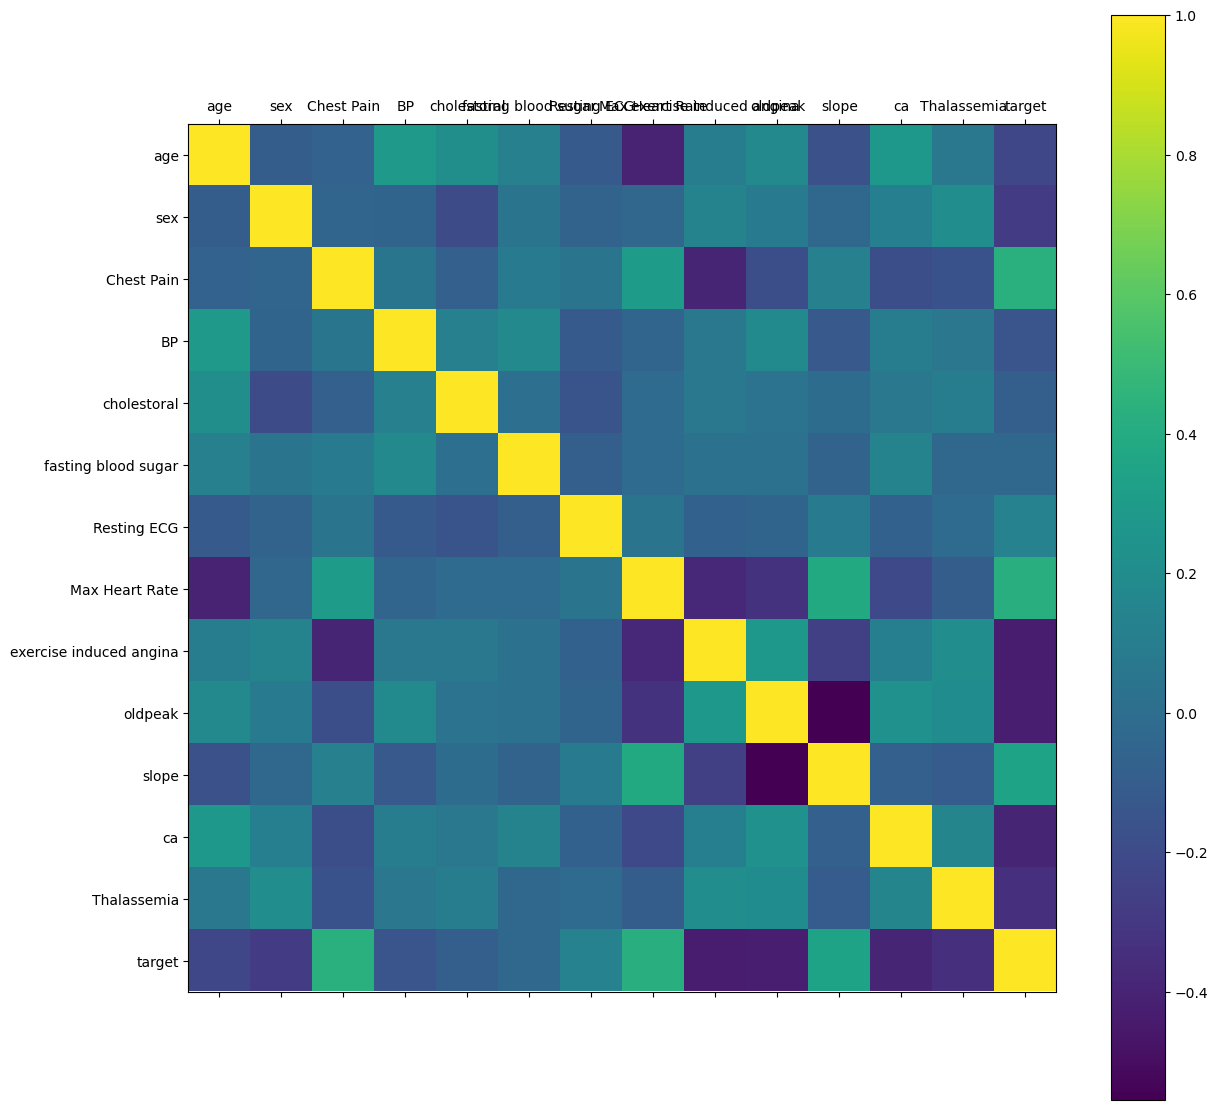

In [22]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(data.corr())
plt.yticks(np.arange(data.shape[1]), data.columns)
plt.xticks(np.arange(data.shape[1]), data.columns)
plt.colorbar()

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'Chest Pain'}>,
        <Axes: title={'center': 'BP'}>],
       [<Axes: title={'center': 'cholestoral'}>,
        <Axes: title={'center': 'fasting blood sugar'}>,
        <Axes: title={'center': 'Resting ECG'}>,
        <Axes: title={'center': 'Max Heart Rate'}>],
       [<Axes: title={'center': 'exercise induced angina'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'Thalassemia'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

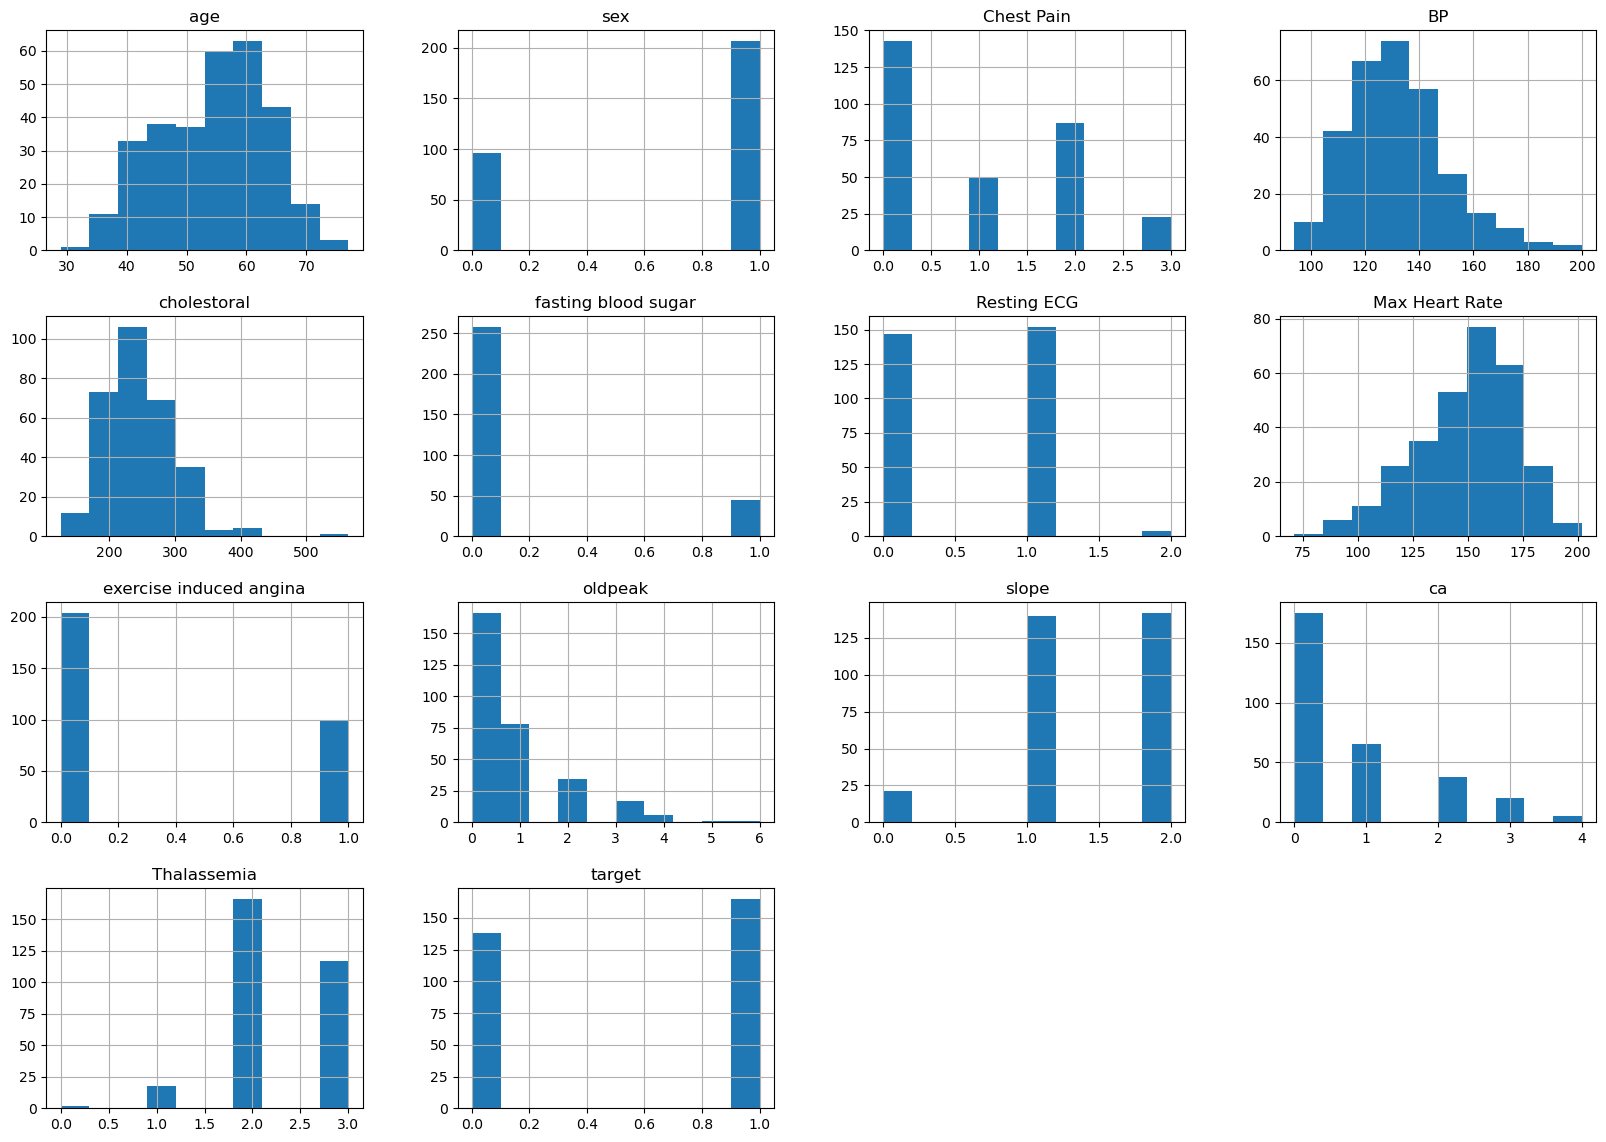

In [23]:
data.hist()

Text(0.5, 1.0, 'Count of target')

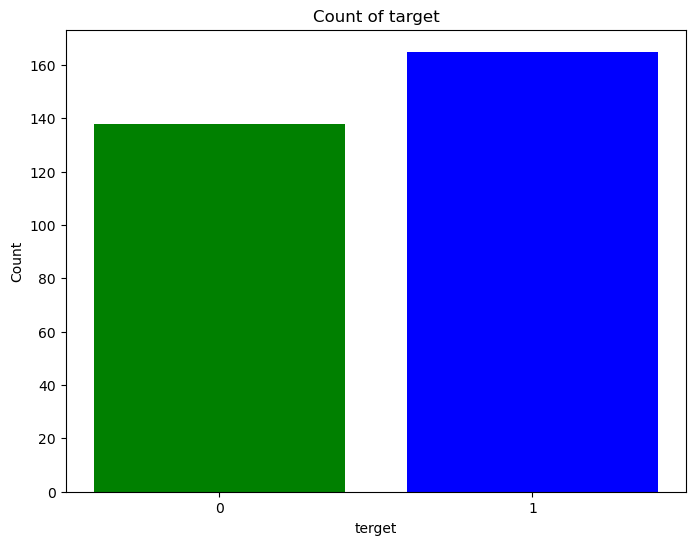

In [24]:
rcParams['figure.figsize'] = 8,6
plt.bar(data['target'].unique(), data['target'].value_counts(), color = ['blue', 'green'])
plt.xticks([0, 1])
plt.xlabel('terget')
plt.ylabel('Count')
plt.title('Count of target')
#(1 = yes, 0 = no)

In [25]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

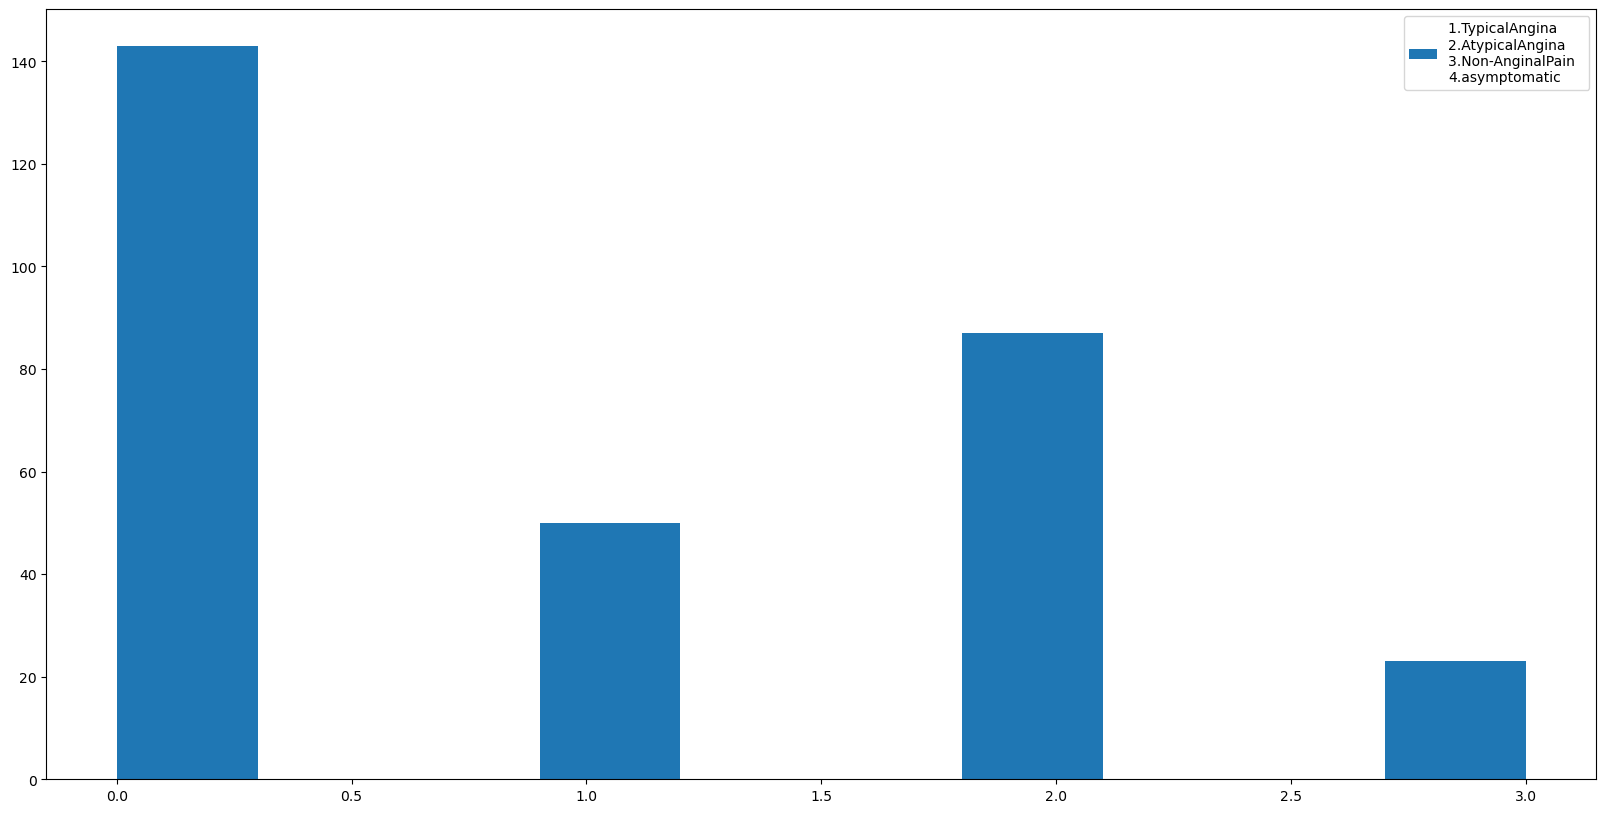

In [26]:
plt.figure(figsize=(20,10))
plt.hist(data["Chest Pain"], label=["1.TypicalAngina \n2.AtypicalAngina  \n3.Non-AnginalPain  \n4.asymptomatic"])
plt.legend(loc='upper right')

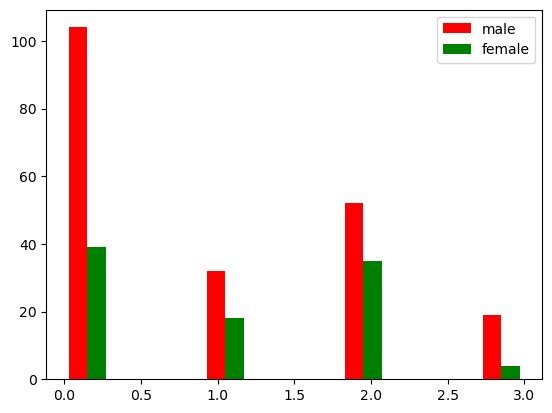

In [25]:
CPmale = data[["Chest Pain"]].where(data["sex"]==1).dropna()
CPfemale = data[["Chest Pain"]].where(data["sex"]==0).dropna()
plt.hist([CPmale["Chest Pain"],CPfemale["Chest Pain"]],label=["male","female"],color=["red","green"])

plt.legend(loc="upper right")



In [28]:
X = data.drop(columns='target', axis=1)
Y = data['target']

In [29]:
print(X)

     age  sex  Chest Pain   BP  cholestoral  fasting blood sugar  Resting ECG  \
0     63    1           3  145          233                    1            0   
1     37    1           2  130          250                    0            1   
2     41    0           1  130          204                    0            0   
3     56    1           1  120          236                    0            1   
4     57    0           0  120          354                    0            1   
..   ...  ...         ...  ...          ...                  ...          ...   
298   57    0           0  140          241                    0            1   
299   45    1           3  110          264                    0            1   
300   68    1           0  144          193                    1            1   
301   57    1           0  130          131                    0            1   
302   57    0           1  130          236                    0            0   

     Max Heart Rate  exerci

In [30]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int32


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=1)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (257, 13) (46, 13)


In [33]:
modelog = LogisticRegression()

In [34]:
from sklearn.neighbors import KNeighborsClassifier

modelknc = KNeighborsClassifier()

In [35]:
from sklearn.tree import DecisionTreeClassifier
modeldtc = DecisionTreeClassifier()

In [36]:
from sklearn.svm import SVC
modelsvc = SVC()

In [37]:
modelog.fit(X_train, Y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
modelknc.fit(X_train, Y_train)

KNeighborsClassifier()

In [39]:
modeldtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [40]:
modelsvc.fit(X_train, Y_train)

SVC()

In [41]:
X_train_prediction = modelog.predict(X_train)
training_data_accuracylog = accuracy_score(X_train_prediction, Y_train)


In [42]:
X_train_prediction = modelknc.predict(X_train)
training_data_accuracyknc = accuracy_score(X_train_prediction, Y_train)

In [43]:
X_train_prediction = modeldtc.predict(X_train)
training_data_accuracydtc = accuracy_score(X_train_prediction, Y_train)

In [44]:
X_train_prediction = modelsvc.predict(X_train)
training_data_accuracysvc = accuracy_score(X_train_prediction, Y_train)

In [45]:
print('Accuracy on Training data of logistic regression: ', training_data_accuracylog)

Accuracy on Training data of logistic regression:  0.8560311284046692


In [46]:
print('Accuracy on Training data of k neighbors classifier: ', training_data_accuracyknc)

Accuracy on Training data of k neighbors classifier:  0.77431906614786


In [47]:
print('Accuracy on Training data of decision tree classifier : ', training_data_accuracydtc)

Accuracy on Training data of decision tree classifier :  1.0


In [48]:
print('Accuracy on Training data of super vector classifier : ', training_data_accuracysvc)

Accuracy on Training data of super vector classifier :  0.6964980544747081


In [49]:
X_test_prediction = modelog.predict(X_test)
test_data_accuracylog = accuracy_score(X_test_prediction, Y_test)

In [50]:
X_test_prediction = modelknc.predict(X_test)
test_data_accuracyknc= accuracy_score(X_test_prediction, Y_test)

In [51]:
X_test_prediction = modeldtc.predict(X_test)
test_data_accuracydtc= accuracy_score(X_test_prediction, Y_test)

In [52]:
X_test_prediction = modelsvc.predict(X_test)
test_data_accuracysvc= accuracy_score(X_test_prediction, Y_test)

In [53]:
print('Accuracy on Test data of logistic regression: ',test_data_accuracylog)

Accuracy on Test data of logistic regression:  0.7608695652173914


In [54]:
print('Accuracy on Test data of kneighbor classifier: ', test_data_accuracyknc)

Accuracy on Test data of kneighbor classifier:  0.5652173913043478


In [55]:
print('Accuracy on Test data of decision tree classifier  : ', test_data_accuracydtc)

Accuracy on Test data of decision tree classifier  :  0.7391304347826086


In [56]:
print('Accuracy on Test data of super vector classifier : ', test_data_accuracysvc)

Accuracy on Test data of super vector classifier :  0.5434782608695652


In [57]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

input_data_as_numpy_array= np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = modelog.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [58]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,1,2)

input_data_as_numpy_array= np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = modelknc.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [59]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

input_data_as_numpy_array= np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = modeldtc.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [60]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

input_data_as_numpy_array= np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = modelsvc.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0., 0., 0., 0.])